# Opdracht 3 Data minning

## Clustering

**Wat is clustering?**
<br>
Clustering helpt bij het classificeren van data in verschillende groepen afhankelijk van kenmerken. Op deze manier krijg kan je de data delen in groepen en subgroepen. Dit zorgt ervoor dat je de data op basis van de soorten duidelijk analyseren.

**Wanneer wordt het gebruikt?**
<br>
Clustering wordt gebruikt aan het begin bij het bekijken van de dataset om de structuur van de dataset te bekijken. Door middel van clustering kan je de data categoriseren, classificeren en de outliers herkennen.

### Gekozen model DBSCAN model

**Wat doet het model?**
<br>
De DBSCAN model is een bekende clustering algoritme voor gegevensclustering dat vaak gebruikt wordt bij data mining en machine learning. Het model is gemaakt op basis van de dichtheid in ruimtelijke clustering. DBSCAN is een bekend algoritme voor gegevensclustering dat veel wordt gebruikt in datamining en machine learning.

**Hoe werkt het model?**
<br>
Het model werkt op basis van een reeks punten, groepeert de DBSCAN punten die dicht bij elkaar liggen op basis van een afstandsmeting en een minimum aantal punten. Het markeert ook als uitschieters de punten die zich in gebieden met een lage dichtheid bevinden.

**Wat zijn de voor- en nadelen?**
<br>
Voordelen:
- Het is niet nodig om vooraf het aantal clusters op te geven.
- Het model presteert goed met clusters met willekeurige vormen.
- Het model kan gemakkelijk de outliers herkennen

Nadelen:
- In sommige gevallen is het bepalen van een gepaste afstand tussen de punten ten aan zien van de eps niet eenvoudig
- Als clusters erg verschillen van dichtheid binnen clusters, is de DBSCAN niet erg geschikt om clusters te definiëren.

**Welke parameters kan je instellen?**
<br>
Het model heeft de mogelijkheid om de volgende twee parameters in te stellen: eps en minPoints. 
<br>

**Wat betekenen deze parameters?**
<br>
De eps specifeert de afstand tussen de punten. Twee punten worden als buren beschouwd als de afstand tussen hen kleiner is dan of gelijk is aan eps. Bij minPoints wordt het minimum aantal datapunten om een cluster te definiëren berekend.
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

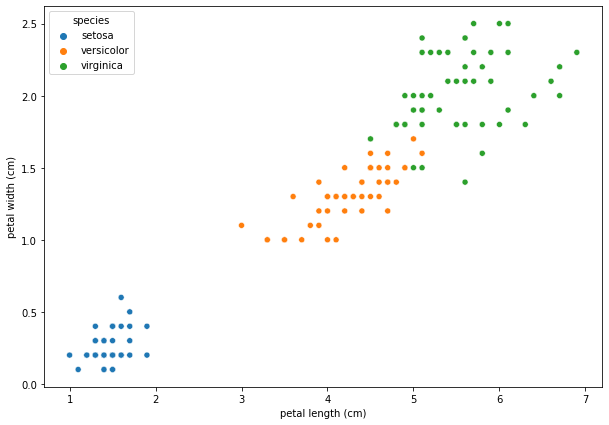

In [5]:
sns.scatterplot(x='petal length (cm)', 
                y = 'petal width (cm)', 
                data = df, 
                hue = 'species')

In [6]:
from sklearn.cluster import MeanShift
X = np.array(df[['petal length (cm)','petal width (cm)']])
clustering = MeanShift(bandwidth=2).fit(X)


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

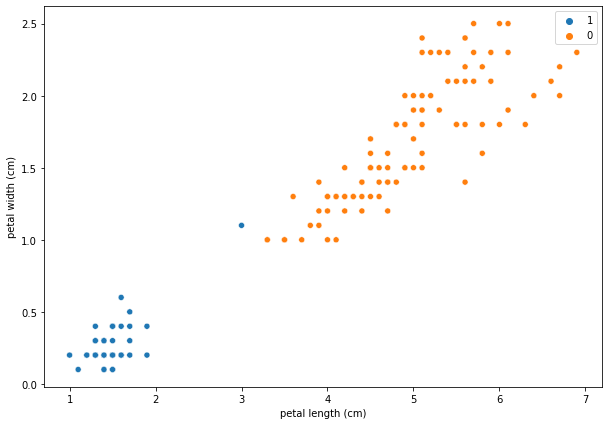

In [7]:
sns.scatterplot(x = df['petal length (cm)'], y = df['petal width (cm)'], hue = clustering.labels_.astype(str))

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

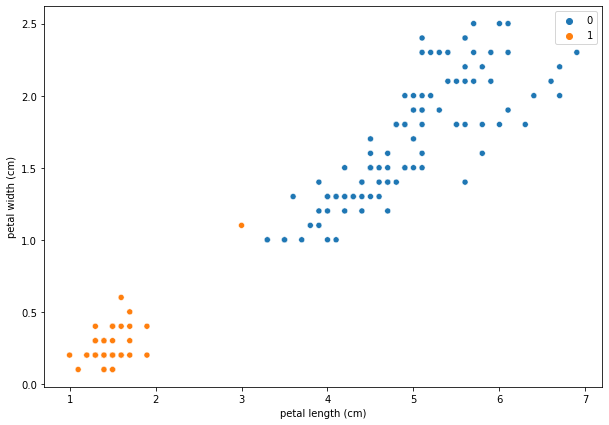

In [8]:
clusterPredict = clustering.predict(X)
sns.scatterplot(x = df['petal length (cm)'], y = df['petal width (cm)'], hue = clusterPredict)

In [9]:
X = iris.data
Y = iris.target

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'],iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [11]:
#Voorspelling op ongelabelde data
X_new = np.array([[5.6,2.8,3.9,1.1],[5.7,2.6,3.8,1.3],[4.7,3.2,1.3,0.2]])
prediction = knn.predict(X_new)
X_new.shape

(3, 4)

In [12]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


In [13]:
#Voorspelling van de betrouwbaarheid van het model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=21,stratify=Y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

In [14]:
#De accuracy is 95% wat een goed percentage is.
#In sommige gevallen voldoet de nauwkeurigheid van het model niet aan de eisen.
#Confusion Matrix wordt gebruikt wanneer data erg uit elkaar ligt.
knn.score(X_test, y_test)

0.9555555555555556

In [15]:
#Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=8)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



Opdracht 2

In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

In [19]:
#2e dataset + Data verkenning
df = pd.read_csv('Mall_Customers.csv.xls')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


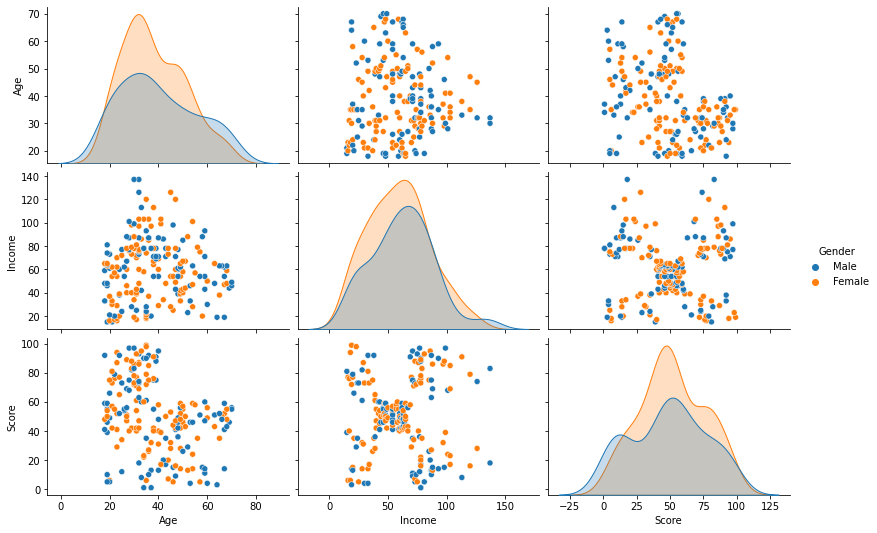

In [22]:
#Laten we de data op een gedetailleerd manier bekijken met een pairplot.
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

DBSCAN model:

/Users/florisnijenhuis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


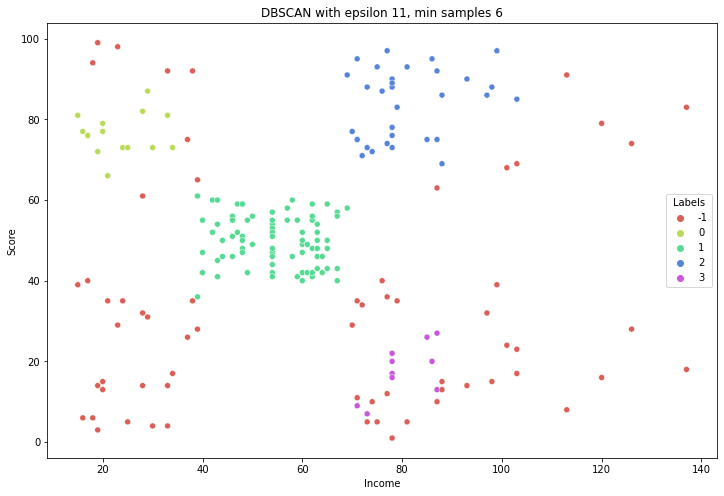

In [23]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

Agglomerative Clustering:

/Users/florisnijenhuis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


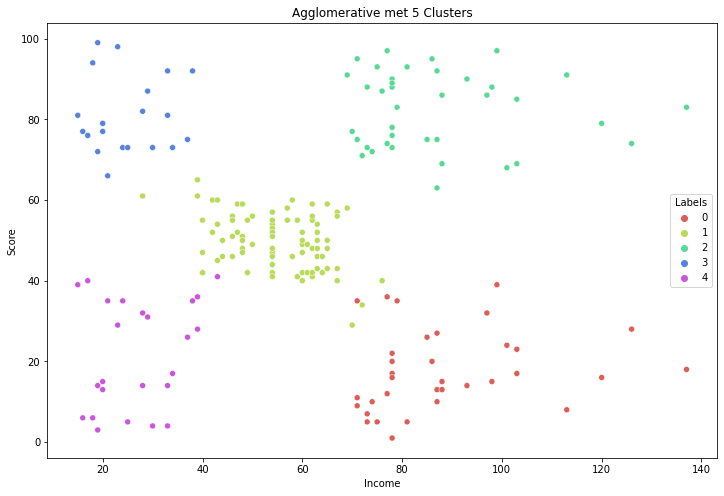

In [24]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative met 5 Clusters')
plt.show()

In [25]:
#Dendrogram die gebruikt kan worden voor Agglomerative Hierarchical Clustering
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


In [26]:
Z = hierarchy.linkage(dist, 'complete')

/var/folders/qv/qw3d54nd0yxg2kyyny05j2mh0000gn/T/ipykernel_84528/3045749611.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'complete')


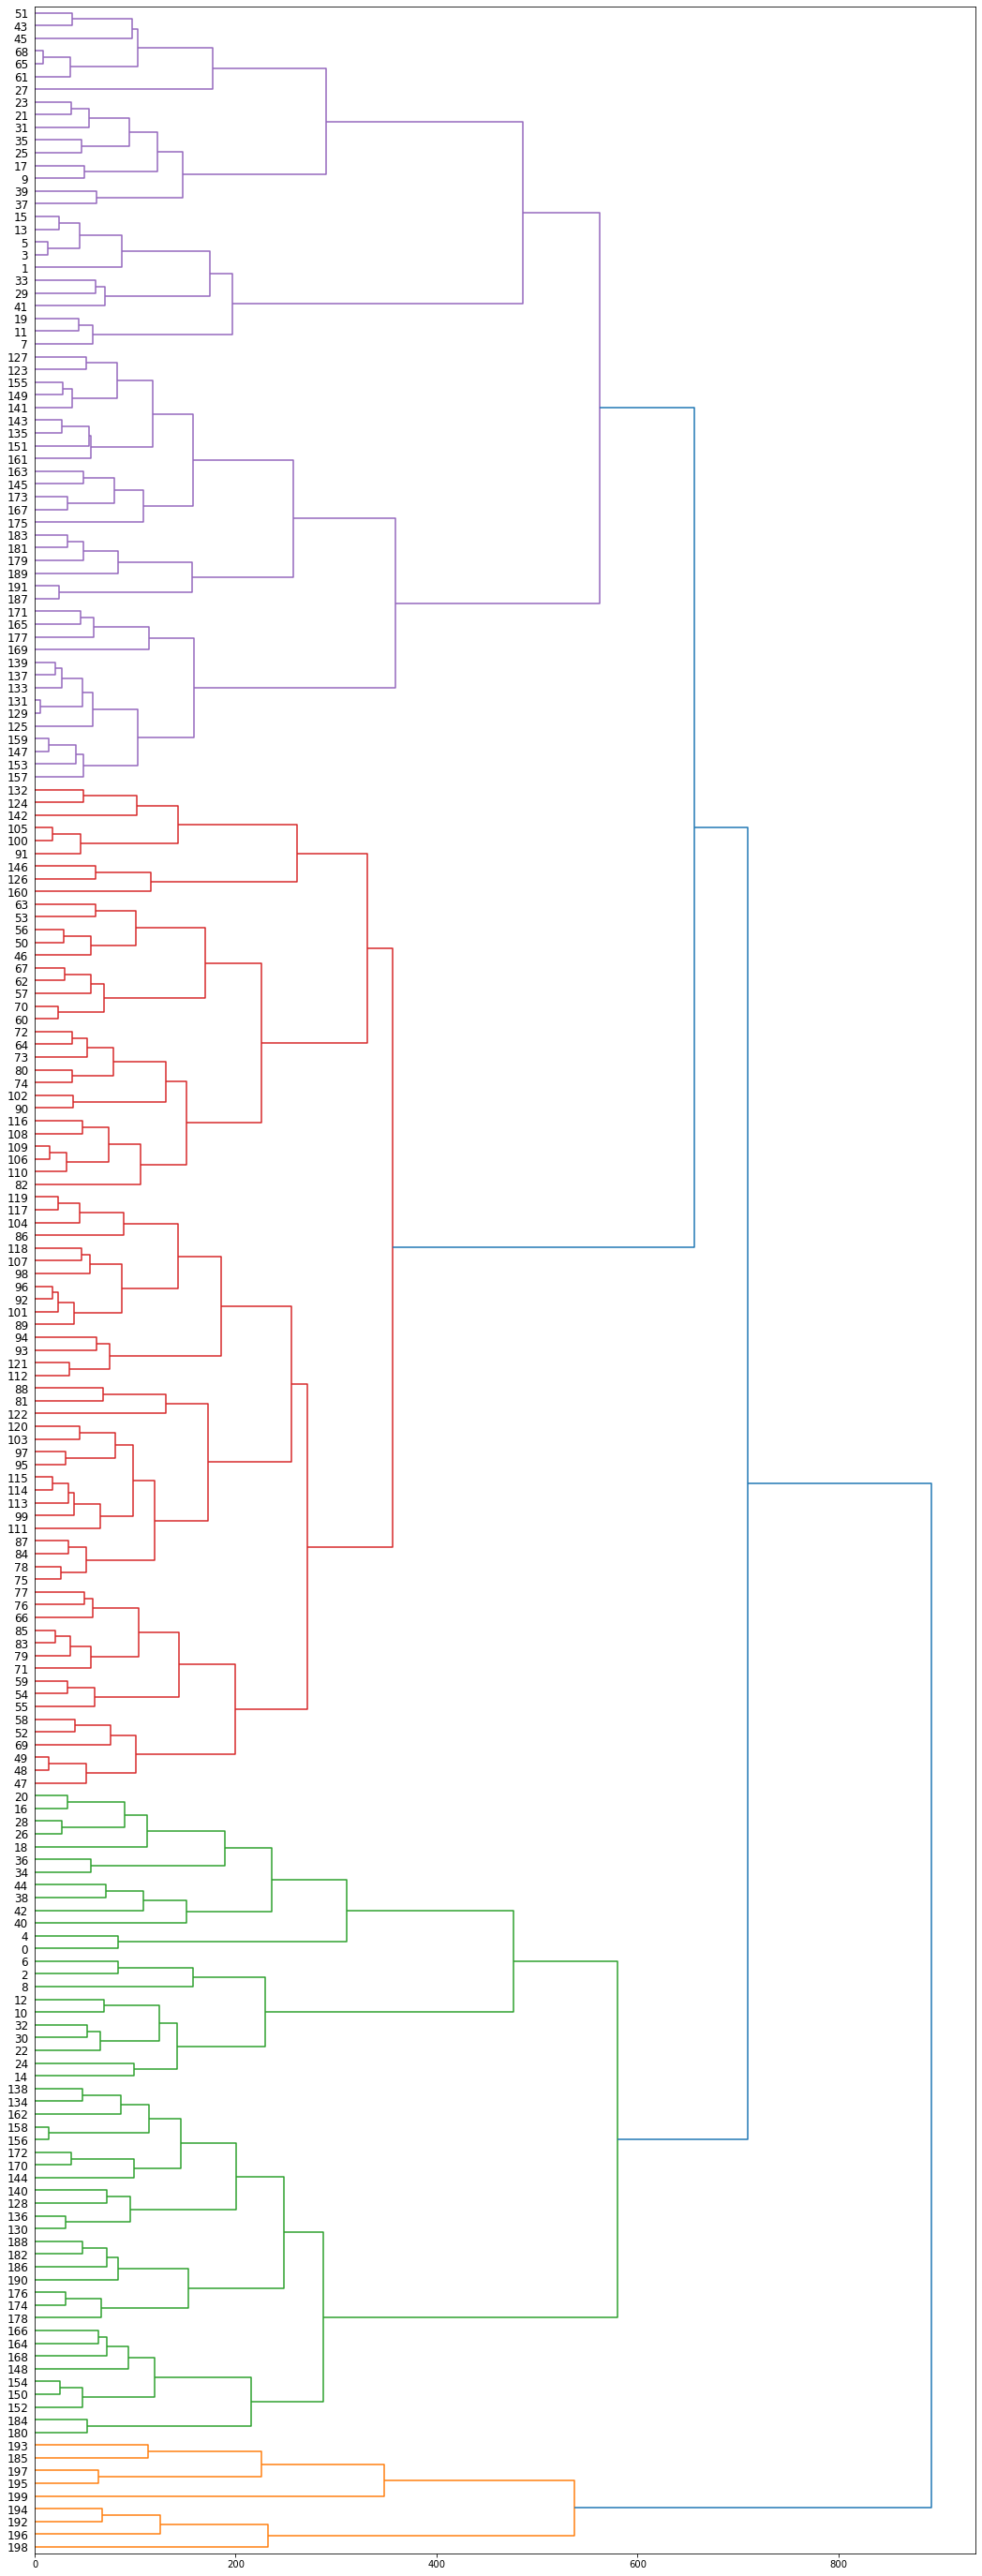

In [27]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

In [28]:
#We hebben een complete koppeling gebruikt voor onze opdracht, hieronder veranderen we het naar een gemiddelde koppeling. 
#Zodat we kunnen zien of de dendrogram veranderd.


/var/folders/qv/qw3d54nd0yxg2kyyny05j2mh0000gn/T/ipykernel_84528/2848005678.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


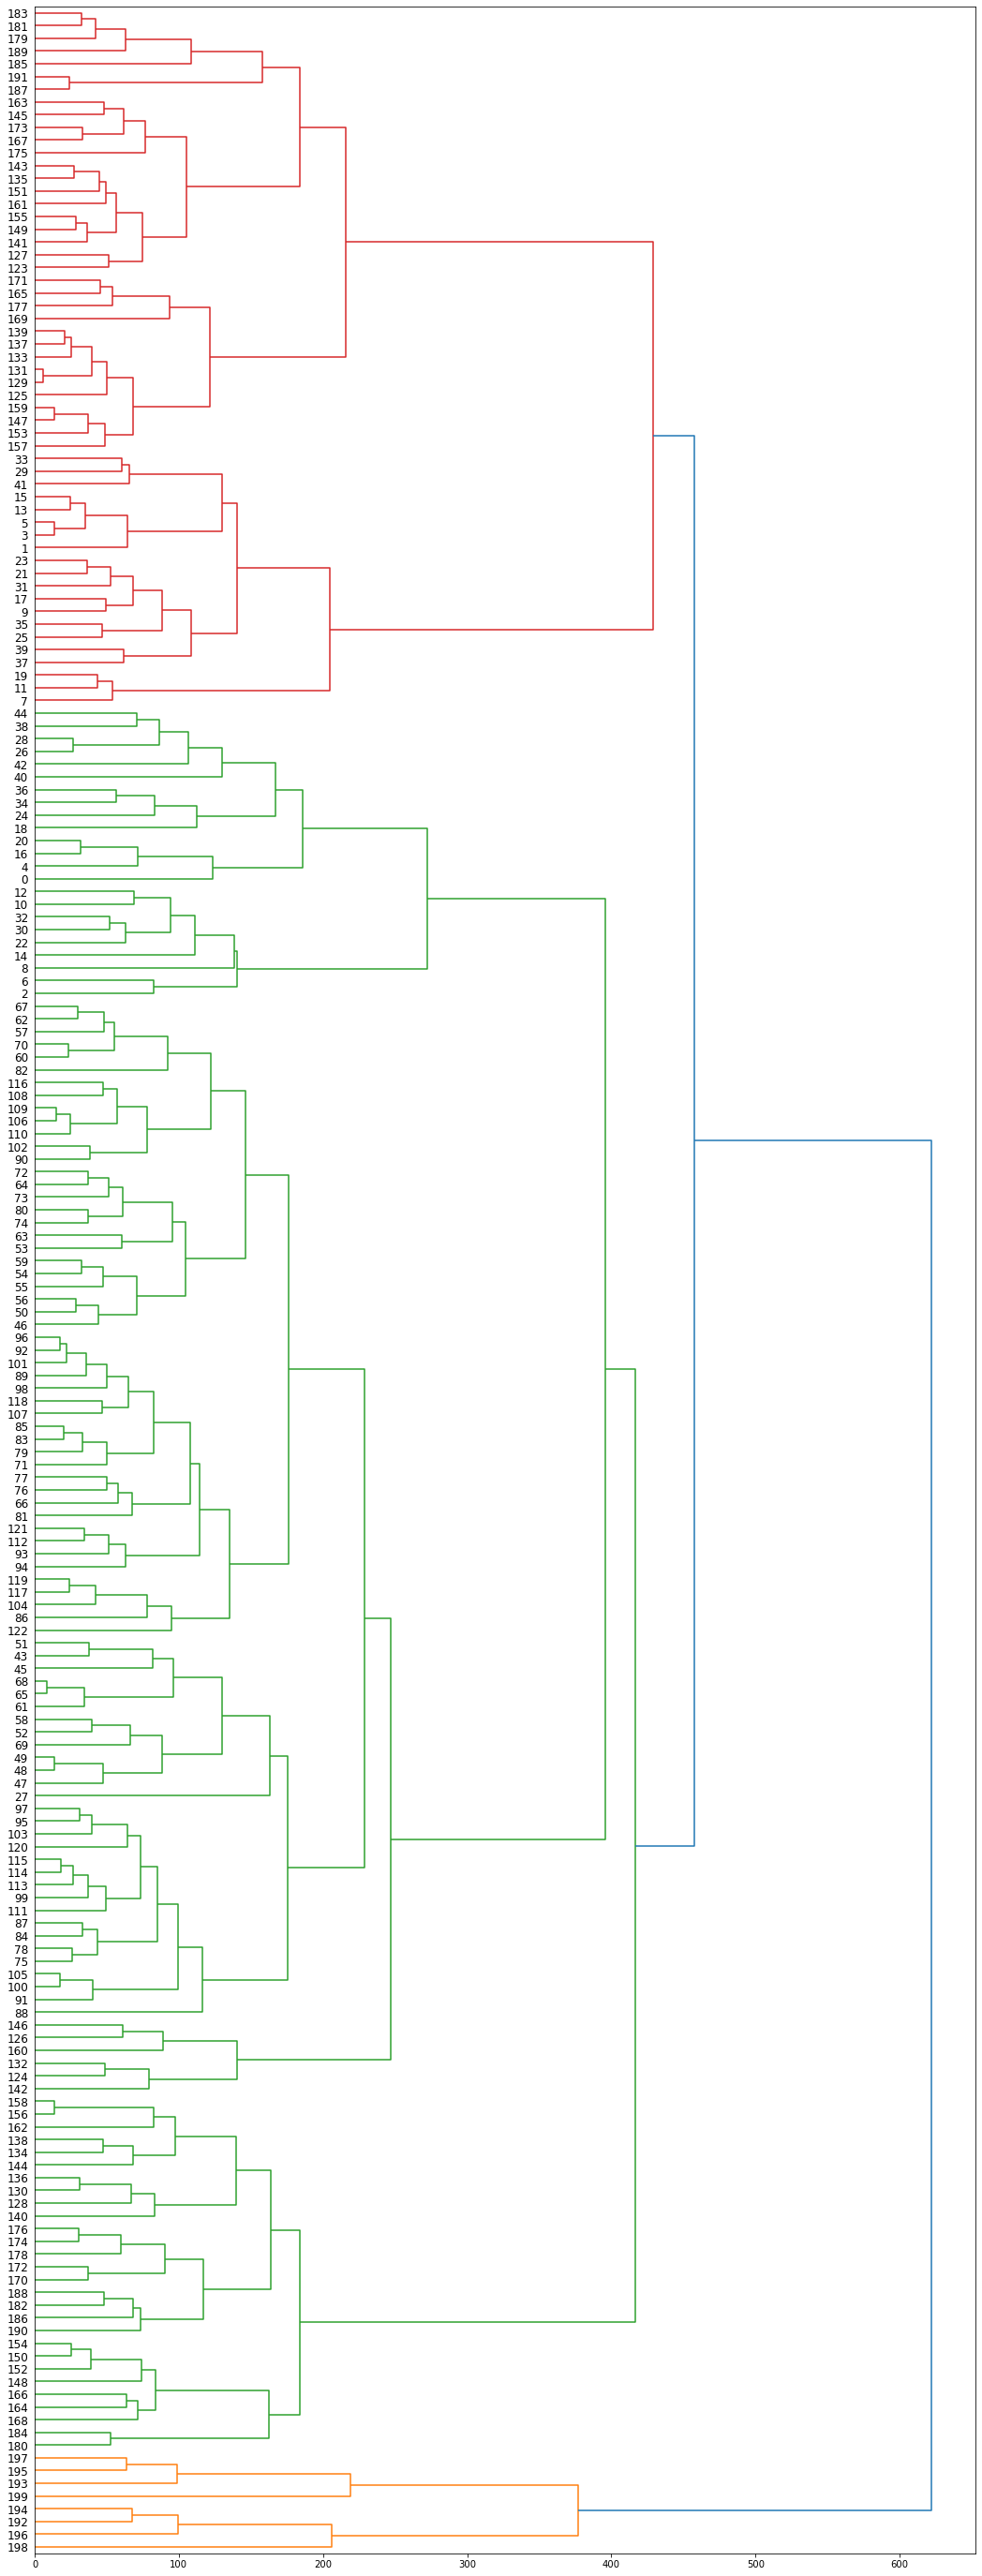

In [29]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Bronvermelding: https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556